In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Project/Normal-Data-Visulization/datasets/googleplaystore/googleplaystore.csv')

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8056,Theme for Tecno Camon CX / C8,LIFESTYLE,4.6,147,9.8M,"10,000+",Free,0,Everyone,Lifestyle,"May 2, 2017",1.0.1,4.0 and up
7403,CircleCI Viewer,PRODUCTIVITY,4.6,16,3.2M,"1,000+",Free,0,Everyone,Productivity,"August 23, 2017",1.3.2,4.4 and up
7045,Berner Zeitung,NEWS_AND_MAGAZINES,3.4,736,8.5M,"50,000+",Free,0,Teen,News & Magazines,"August 3, 2018",7.5.9.1,4.1 and up
10300,Financial Calculator India,FINANCE,4.6,13819,3.9M,"1,000,000+",Free,0,Everyone,Finance,"July 4, 2018",3.3,4.0 and up
524,"Hide App, Private Dating, Safe Chat - PrivacyH...",DATING,4.4,35206,7.2M,"1,000,000+",Free,0,Everyone,Dating,"May 21, 2018",2.9.6,4.0 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)



In [9]:
df['Price'].dtype

dtype('float64')

In [10]:
df['Reviews'] = pd.to_numeric(df['Reviews'] , errors = 'coerce').fillna(0)
df['Reviews'].isna().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [12]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [13]:
df['Last Updated'].fillna(method='ffill', inplace=True)

df['Last Updated'].isna().sum()


D:\Temp\ipykernel_2212\4049915160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Updated'].fillna(method='ffill', inplace=True)
D:\Temp\ipykernel_2212\4049915160.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Last Updated'].fillna(method='ffill', inplace=True)


0

In [14]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+',''))

In [15]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',',''))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

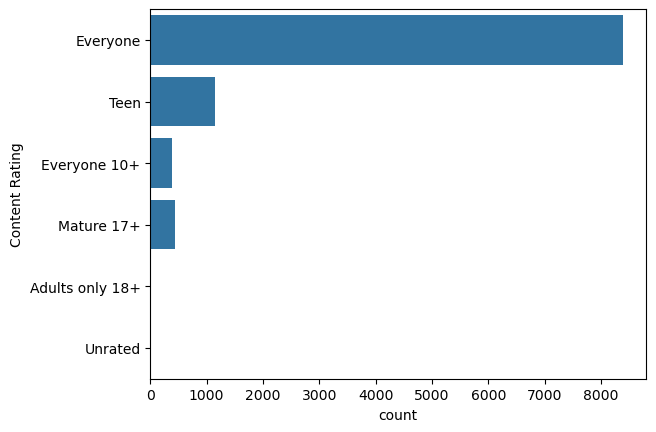

In [21]:
## Count plot

sns.countplot(df['Content Rating'])
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          8893 non-null   float64       
 3   Reviews         10358 non-null  float64       
 4   Size            10358 non-null  object        
 5   Installs        10358 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10358 non-null  object        
 10  Last Updated    10358 non-null  datetime64[ns]
 11  Current Ver     10350 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ MB


In [23]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0)

In [24]:
df['Type'] = np.where(df['Type'] == 'Free', 0, 1)

In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   float64       
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   float64       
 6   Type            8886 non-null   int32         
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 937.2+ KB


In [27]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4251,J-Novel Club,FAMILY,3.3,162.0,9.0M,10000.0,0,0.0,Teen,Entertainment,2017-10-22,1.2,4.1 and up
3974,Perfect Piano,GAME,4.2,828489.0,Varies with device,50000000.0,0,0.0,Everyone,Music,2018-08-04,Varies with device,Varies with device
4211,Talking Ben the Dog,FAMILY,4.3,1633565.0,57M,100000000.0,0,0.0,Everyone,Entertainment,2018-07-03,3.5.2.2,4.1 and up
148,Book store,BOOKS_AND_REFERENCE,4.4,22486.0,5.4M,1000000.0,0,0.0,Teen,Books & Reference,2018-06-06,3.2.1,4.0 and up
9867,EU Flags Free Live Wallpaper,PERSONALIZATION,3.4,730.0,2.3M,100000.0,0,0.0,Everyone,Personalization,2013-11-18,1.95,2.1 and up


In [28]:
df['year'] = df['Last Updated'].dt.year
df['year'].value_counts()

year
2018    6095
2017    1457
2016     638
2015     383
2014     185
2013      91
2012      21
2011      15
2010       1
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

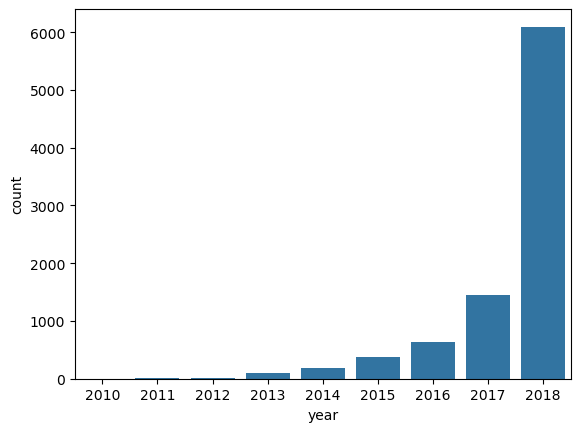

In [29]:
sns.countplot(x = df['year'])

<Axes: xlabel='Type', ylabel='count'>

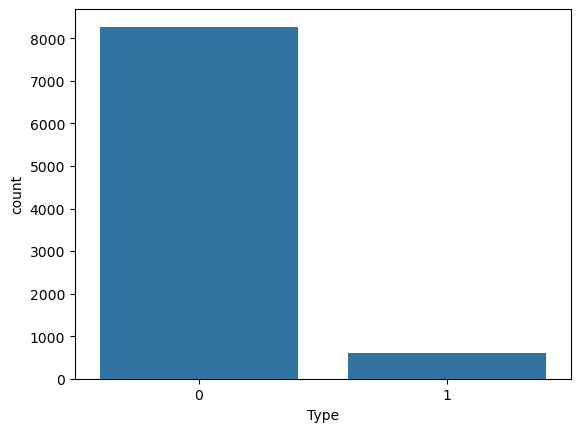

In [30]:
sns.countplot(x = df['Type'])

<Axes: ylabel='count'>

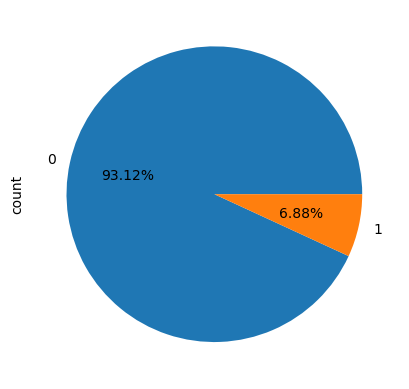

In [32]:
df['Type'].value_counts().plot(kind='pie' , autopct='%1.2f%%')